<a href="https://colab.research.google.com/github/Yannlpl/Yannlpl/blob/circleci-project-setup/Import_export_dataframe_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and export data frame 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("marketing_campaign.csv", sep='\t')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.shape

(2240, 29)

# Data cleaning 

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
edu = df['Education'].unique()
edu

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
pd.isnull(df[['Income', 'Education']]).apply(sum)

Income       24
Education     0
dtype: int64

In [ ]:
#replcae null by mean

S = df.groupby('Education')['Income'].mean()

for edu in S.index:
    df.loc[pd.isnull(df['Income']), 'Income'] = S[edu]

In [ ]:
pd.isnull(df[['Income', 'Education']]).apply(sum)

Income       0
Education    0
dtype: int64

In [ ]:
for k in df.columns:
    print('%20s - %s' % (k, df[k].dtype))

                  ID - int64
          Year_Birth - int64
           Education - object
      Marital_Status - object
              Income - float64
             Kidhome - int64
            Teenhome - int64
         Dt_Customer - object
             Recency - int64
            MntWines - int64
           MntFruits - int64
     MntMeatProducts - int64
     MntFishProducts - int64
    MntSweetProducts - int64
        MntGoldProds - int64
   NumDealsPurchases - int64
     NumWebPurchases - int64
 NumCatalogPurchases - int64
   NumStorePurchases - int64
   NumWebVisitsMonth - int64
        AcceptedCmp3 - int64
        AcceptedCmp4 - int64
        AcceptedCmp5 - int64
        AcceptedCmp1 - int64
        AcceptedCmp2 - int64
            Complain - int64
       Z_CostContact - int64
           Z_Revenue - int64
            Response - int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_label = pd.DataFrame()

for k in df.columns:
    if df[k].dtype == object:
        enc = LabelEncoder()
        df_label[k] = enc.fit_transform(df[k])
    else:
        df_label[k] = df[k]

In [ ]:
df_label.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Classification and clustering Models

unsupervised learning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Drawing the chart for the col which starts with "Mnt"

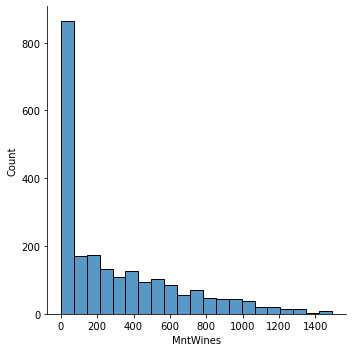

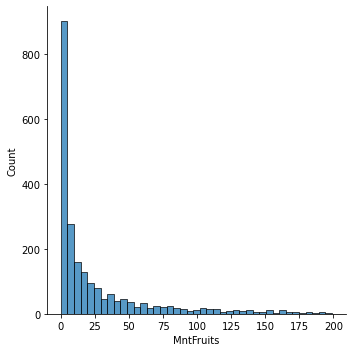

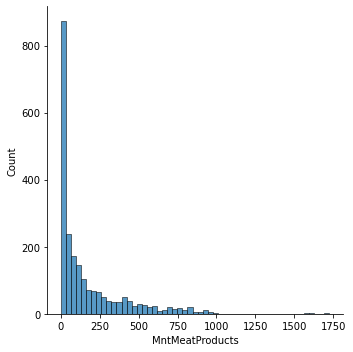

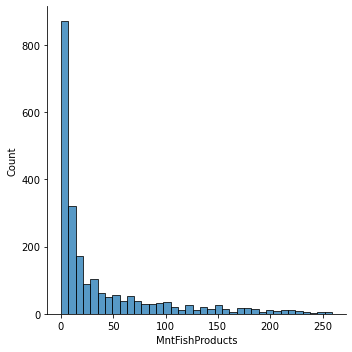

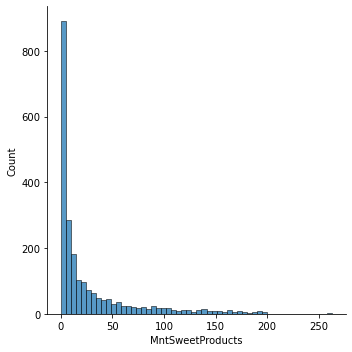

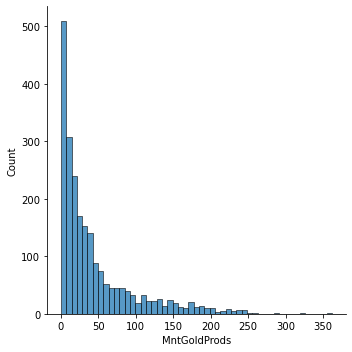

In [ ]:
col_clustering = []
for x in df.columns:
    if x[:3] == "Mnt":
        col_clustering.append(x)
        sns.displot(df[x])
        plt.show()

#you can see the distrubution of these colomns are similar

In [ ]:
#the cols
col_clustering

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [ ]:
from sklearn.manifold import TSNE
import time

#Dimensionality reduction
#Because in col_clustering there are 6 group(clusters),
It's better for us to put them into 2 Dimension and show the chart of it.

In [ ]:
t0 = time.time()
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_label[col_clustering])
print('Time cost: %8.2f s' % (time.time() - t0))

Time cost:    17.10 s


In [ ]:
df_tsne.shape

(2240, 2)

In [ ]:
#k=3
kmeans = KMeans(n_clusters=3).fit(df_label[col_clustering])
centroids = kmeans.cluster_centers_

In [ ]:
kmeans.labels_.shape

(2240,)

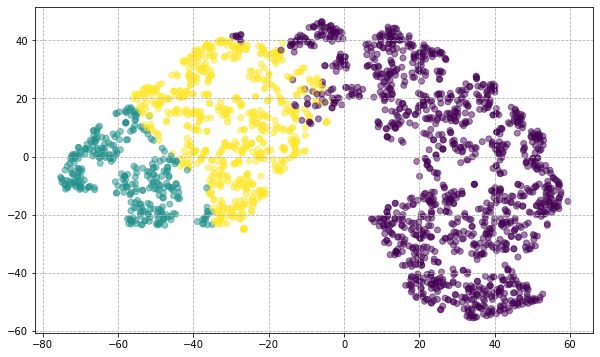

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne[:,0], df_tsne[:,1], c= kmeans.labels_.astype(float), alpha=.5)
#The center of each cluster-red point
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.grid(linestyle='--')
plt.show()

#To see how it will distribute if k=3

# elbow method - find k value

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_label)
    distortions.append(kmeanModel.inertia_)

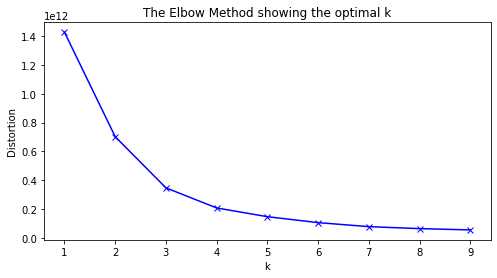

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#conclusion

The concept is based on SSE (sum of the squared errors) as an indicator to calculate the distance from each point in each group to the center of the group.
And the total groups is K.

Creating the graph by K and SSE, we can observe which point is at the decline of SSE changes from "rapidly to gentle".
This is the Inflection point, and we will select it as K.
Because this point can ensure that K in the clusters is beneficial, it is suitable as a criterion for clustering.

# Silhouette Method showing the optimal k

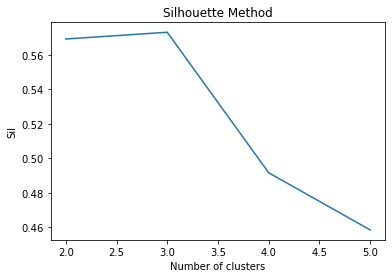

2:0.5691284572170009
3:0.5730398030573405
4:0.4916041493000831
5:0.458503478586195


In [ ]:
from sklearn.metrics import silhouette_score
sil = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters = k).fit(df_label)
    preds = kmeans.fit_predict(df_label)
    sil.append(silhouette_score(df_label, preds, metric = 'euclidean'))
plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
    print(str(i+2) +":"+ str(sil[i]))

In [ ]:
print("The best sil:",max(sil))
#As you can see the max sil value is when K=3

The best sil: 0.5730398030573405


# Conclusion:

Using these two method to find the optimal k, the result is the same on when k=3.

In [ ]:
df_label.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df_label['cluster'] = kmeans.labels_.astype(float)

In [ ]:
df_label.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'cluster'],
      dtype='object')

# As follows we can see:
    for amount in every product(wine/Fruits/MeatProducts/FishProducts/SweetProducts/GoldProds) is divided into 3 groups,
        1)Wine: group1 buy the most and gruop0 consume the least.
        2)Fruits:group0 buy the least , and the group 1 and 2 are nearly the same.
        3)MeatProducts:group0 buy the least , and the group 1 and 2 are nearly the same.
        4)FishProducts:group0 buy the least , and the group 1 and 2 are nearly the same.
        5)SweetProducts:group0 buy the least , and the group 1 and 2 are nearly the same.
        6)GoldProds:group0 buy the least, and the group 1 and 2 are nearly the same.

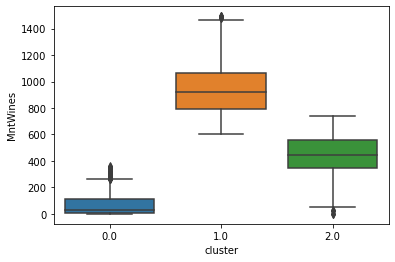

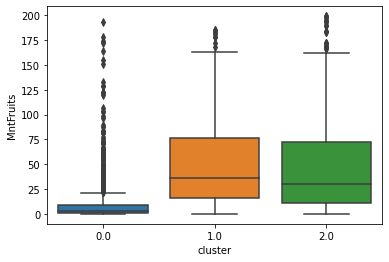

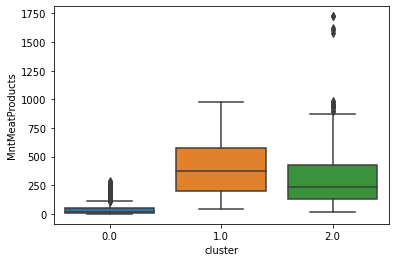

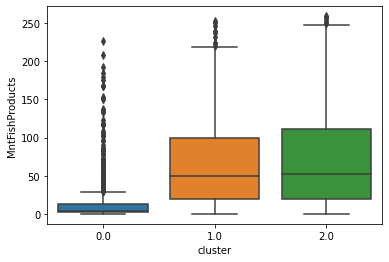

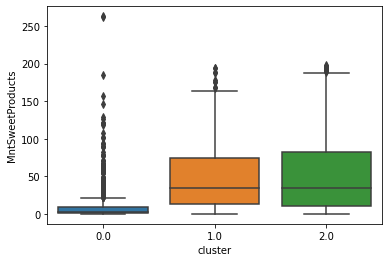

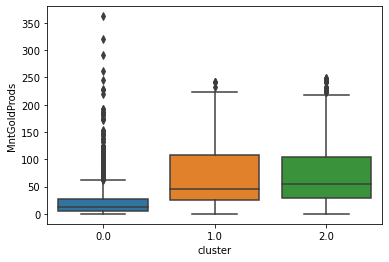

In [ ]:
for i in range(6):
    sns.boxplot(x='cluster', y=col_clustering[i], data=df_label)
    plt.show()

# Finding the data just contain 0 or 1:
And we found 7 columns:AcceptedCmp 1 to 5 & Complain & Response
We see the dataframe:


In [ ]:
col_bi = []
for k in df_label.columns:
    if len(df_label[k].unique()) == 2:
        col_bi.append(k)

In [ ]:
df_label[col_bi + ['cluster']].groupby('cluster').mean()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
cluster,,,,,,,
0.0,0.067494,0.019395,0.002327,0.003879,0.003103,0.011637,0.098526
1.0,0.104615,0.280000,0.356923,0.252308,0.064615,0.000000,0.369231
2.0,0.067093,0.081470,0.070288,0.091054,0.007987,0.009585,0.138978


# Cluster income:
For income under 200000(ignore the max:666666)
we can observe that: In group 0, they earn less money than group 1 and 2.

In [ ]:
df_label['Income'].max()

666666.0

(0.0, 200000.0)

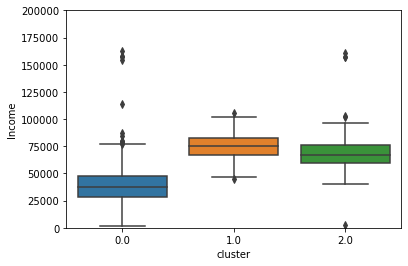

In [ ]:
sns.boxplot(x='cluster', y='Income', data=df_label)
plt.ylim(0, 200000)

# For how many child in a family:
In group 0, they have more children in their family.

In [ ]:
df_label['Kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [ ]:
df_label['Kidhome']

0       0
1       1
2       0
3       1
4       1
       ..
2235    0
2236    2
2237    0
2238    0
2239    1
Name: Kidhome, Length: 2240, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='mean_kid'>

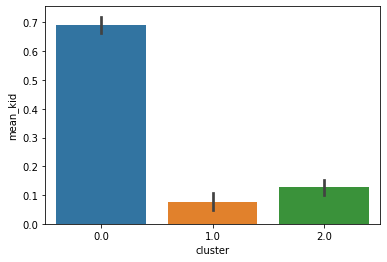

In [ ]:
df_label['mean_kid']= df_label['Kidhome']
sns.barplot(x='cluster', y='mean_kid',data=df_label)

# Simple Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

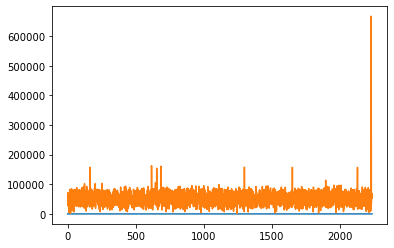

In [ ]:
#Use Year_birth calculate Age
df["Age"]=2010 - df["Year_Birth"]
x = df["Age"]
y = df["Income"]

plt.plot(x)
plt.plot(y)
plt.show()

In [ ]:
X = df["Age"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df["Income"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions

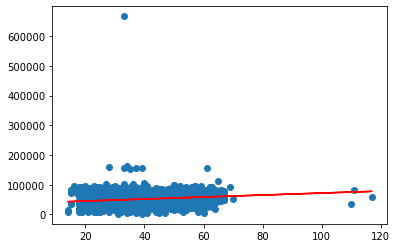

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     59.32
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.00e-14
Time:                        01:51:12   Log-Likelihood:                -25836.
No. Observations:                2240   AIC:                         5.168e+04
Df Residuals:                    2238   BIC:                         5.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.837e+04   1870.376     20.512      0.0

In [ ]:
'''
In this chart we can see:
The p value is close to zero
it can be interpreted as a regression relationship between the variables Age and Income at the significance level of 0.05, which is significant
and 
1. the intercept is 38370
2. the slope is 335.7849
'''

'\nIn this chart we can see:\nThe p value is close to zero\nit can be interpreted as a regression relationship between the variables Age and Income at the significance level of 0.05, which is significant\nand \n1. the intercept is 38370\n2. the slope is 335.7849\n'

In [ ]:
df_regression = df[df['Income']<600000]

In [ ]:
X = df_regression["Age"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_regression["Income"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions

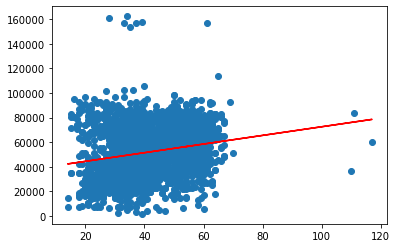

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
# import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     90.07
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           5.67e-21
Time:                        01:51:12   Log-Likelihood:                -25459.
No. Observations:                2239   AIC:                         5.092e+04
Df Residuals:                    2237   BIC:                         5.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.744e+04   1589.175     23.560      0.0

In [ ]:
'''
After deleting the extreme value:
1. the intercept is 37590
2. the slope is 348.744

the std err is less then before, it means the model is better after removing the extreme value
'''

'\nAfter deleting the extreme value:\n1. the intercept is 37590\n2. the slope is 348.744\n\nthe std err is less then before, it means the model is better after removing the extreme value\n'

# Logistic Regression

In [ ]:
'''
Logistic regression mainly explores the relationship between the dependent variable and the independent variable.
The dependent variable (Y) in linear regression is usually a continuous variable, 
but the dependent variable (Y) discussed in Logistic regression is mainly categorical variables, 
especially variables that are divided into two categories 

'\nLogis regression mainly explores the relationship between the dependent variable and the independent variable.\nThe dependent variable (Y) in linear regression is usually a continuous variable, \nbut the dependent variable (Y) discussed in Logis regression is mainly categorical variables, \nespecially variables that are divided into two categories (for example: yes or no, yes or no , Agree or disagree...... etc.).\n'

In [ ]:
# Logistic Regression to predict which customers may answer to a campain (response = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

X = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
y = df['Response']

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
logistic_model = LogisticRegression(random_state=0, max_iter=1000)
#max_iter:Maximum number of iterations taken for the solvers to converge.
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)) # number of good predictions / total population, thus 465 / 550
print('Precision: ',metrics.precision_score(y_test, y_pred)) # number of true positives / total positives, thus 16 / 28
print('Recall: ',metrics.recall_score(y_test, y_pred))#number of true positives / total true positives + false negatives,thus 16/83


Accuracy:  0.8589285714285714
Precision:  0.5714285714285714
Recall:  0.1927710843373494


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

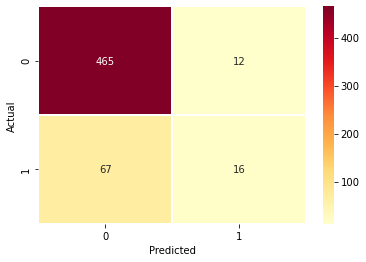

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5, cmap="YlOrRd")

In [ ]:
'''
We can see that, even if accurary is good (0.85), precision is lower (only 0.57) and recall is very bad (0.19).
The regression can find only 19% of customers really positive.
However, 57% of customer predicted as positives are true positives, so the campain efficiency will be rather good.
'''